In [77]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.impute import SimpleImputer

import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [78]:
ruta = 'C:\\Users\\gerson.molina\\Desktop\\Data Scientis\\Datasets'
os.chdir(ruta)

df = pd.read_excel("Amazon_Sales_Report.xlsx")

In [79]:
df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   ship-service-level  128975 non-null  object 
 6   Style               128975 non-null  object 
 7   SKU                 128975 non-null  object 
 8   Category            128975 non-null  object 
 9   Size                128975 non-null  object 
 10  ASIN                128975 non-null  object 
 11  Courier Status      122103 non-null  object 
 12  Qty                 128975 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           128942 non-nul

In [81]:
#Se llenó los valores nulos con la sintaxis 'No especificado'.
df['Courier Status'].fillna('No especificado', inplace=True)
df['ship-city'].fillna('No especificado', inplace=True)
df['ship-state'].fillna('No especificado', inplace=True)
df['ship-postal-code'].fillna('No especificado', inplace=True)
df['ship-country'].fillna('No especificado', inplace=True)
df['promotion-ids'].fillna('No especificado', inplace=True)

#Se eliminaron estas filas con valores nulos ya que no se consideraron indispensables para el análisis.
df.dropna(subset=['currency', 'Amount'], inplace=True)

# Procedemos a imputar las variables b2b y fulfilled-by con el método sklearn.
valores_faltantes_columnas = ["B2B", "fulfilled-by"]
datos_faltantes = df[valores_faltantes_columnas].isnull()

# Crear un imputador que reemplace los valores faltantes con la categoría más frecuente
imputer = SimpleImputer(strategy='most_frequent')

# Realizar la imputación solo en las columnas seleccionadas
df[valores_faltantes_columnas] = imputer.fit_transform(df[valores_faltantes_columnas])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121180 entries, 0 to 128974
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               121180 non-null  int64  
 1   Order ID            121180 non-null  object 
 2   Date                121180 non-null  object 
 3   Status              121180 non-null  object 
 4   Fulfilment          121180 non-null  object 
 5   ship-service-level  121180 non-null  object 
 6   Style               121180 non-null  object 
 7   SKU                 121180 non-null  object 
 8   Category            121180 non-null  object 
 9   Size                121180 non-null  object 
 10  ASIN                121180 non-null  object 
 11  Courier Status      121180 non-null  object 
 12  Qty                 121180 non-null  int64  
 13  currency            121180 non-null  object 
 14  Amount              121180 non-null  float64
 15  ship-city           121180 non-null  ob

**CORRELACION CON EL TARGET**

In [195]:
df = df.apply(pd.to_numeric, errors='coerce')

In [196]:
matriz_correlacion = df.corr(method='pearson')
matriz_correlacion_target = matriz_correlacion['Qty']
matriz_correlacion_target = abs(matriz_correlacion_target)
columnas_a_excluir = ['Qty', 'Qty']
matriz_correlacion_target = matriz_correlacion_target.drop(columns=columnas_a_excluir, index=columnas_a_excluir)
matriz_correlacion_target = matriz_correlacion_target.sort_values(ascending=False)

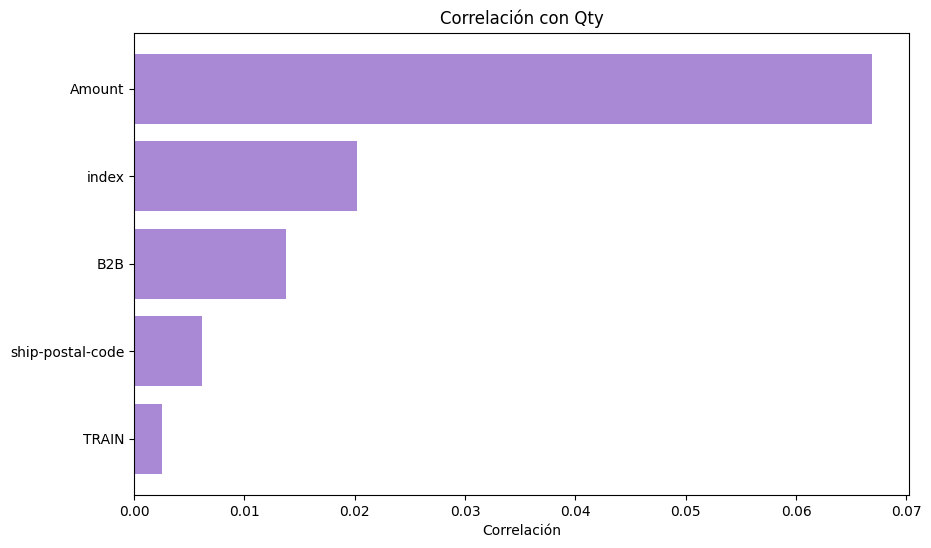

In [244]:
matriz_correlacion_target_graficar = matriz_correlacion_target[0:5]
plt.figure(figsize=(10, 6)) 
plt.barh(matriz_correlacion_target_graficar.index, 
         matriz_correlacion_target_graficar.values,
         color = '#A989D6')
plt.xlabel('Correlación')
plt.title('Correlación con Qty')
plt.gca().invert_yaxis()  
plt.show()

In [198]:
valores_nulos  = df.isnull().sum()
columnas_con_nulos = valores_nulos[valores_nulos == 0]
columnas_con_nulos

index     0
Qty       0
Amount    0
B2B       0
TRAIN     0
dtype: int64

In [199]:
def forward_selection(data, target, significance_level):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(dtype = 'float64',
                             index = remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [215]:
X = df[['index','Amount']]    
y = df['Qty']

In [216]:
X

,index,Amount
0,0,647.62
1,1,406.00
2,2,329.00
3,3,753.33
4,4,574.00
...,...,...
128970,128970,517.00
128971,128971,999.00
128972,128972,690.00
128973,128973,1199.00


In [217]:
y

0         0
1         1
2         1
3         0
4         1
         ..
128970    1
128971    1
128972    1
128973    1
128974    1
Name: Qty, Length: 121180, dtype: int64

In [218]:
initial_features = X.columns.tolist()
best_features = []

In [219]:
initial_features

['index', 'Amount']

In [220]:
best_features

[]

In [221]:
len(initial_features)

2

In [222]:
remaining_features = list(set(initial_features)-set(best_features))
remaining_features

['Amount', 'index']

In [223]:
new_pval = pd.Series(dtype='float64',
                     index = remaining_features)
new_pval

Amount   NaN
index    NaN
dtype: float64

In [224]:
for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(X[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

In [225]:
new_pval

Amount    3.177616e-120
index      1.952282e-12
dtype: float64

In [226]:
min_p_value = new_pval.min()
min_p_value

3.1776158047240675e-120

In [227]:
if(min_p_value<0.01):
            best_features.append(new_pval.idxmin())

In [228]:
best_features

['Amount']

In [229]:
cantidad_registros = df.shape[0]
semilla = 15
np.random.seed(semilla)
serie_random = np.random.rand(cantidad_registros)
df['TRAIN'] = np.where(serie_random < 0.3, 0, 1)

In [231]:
# Cómo quedó la división??
resumen = df.groupby('TRAIN').agg(      
    Cant = ('Amount', 'count'),
    Cant_Exito = ('Amount', 'sum'),    
    Tasa_Exito = ('Amount', 'mean')
).reset_index()
resumen

,TRAIN,Cant,Cant_Exito,Tasa_Exito
0,0,36330,23608163.35,649.825581
1,1,84850,54984514.95,648.020212


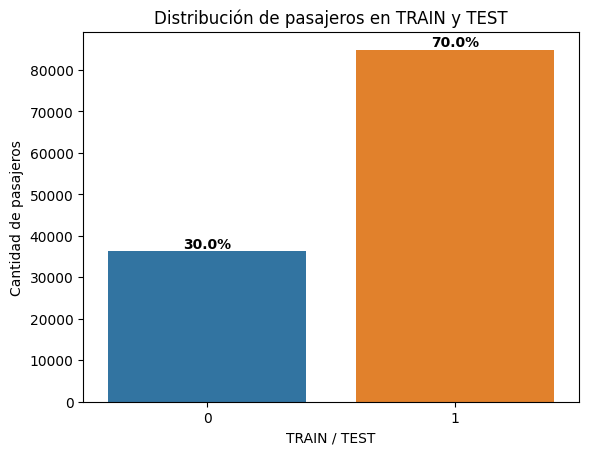

In [233]:
cantidad = len(df['Amount'])

sns.countplot(data = df,
              x = "TRAIN")
plt.xlabel('TRAIN / TEST')
plt.ylabel('Cantidad de pasajeros')
plt.title('Distribución de pasajeros en TRAIN y TEST')
ax = plt.gca()
for p in ax.patches:
    x_text = p.get_x() + p.get_width() / 2.0 
    y_text = p.get_height() 
    ax.text(x_text, y_text, f'{str(round(int(y_text)/cantidad,2) * 100)}%',  
            ha = 'center',
            va = 'bottom',
            fontsize = 10, color = 'black', fontweight = 'bold')
plt.show()

In [237]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Amount']]
y = df['Qty']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.045320509172285466
R-squared (R2): 0.001988890121609521
